In [105]:
import plotly.express as px
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [106]:
df = pd.read_csv("data.csv")
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [107]:
# transform NaN to 0
df = df.fillna(0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [108]:
#rename columns
df = df.rename(columns={'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se', 'concave points_worst': 'concave_points_worst', 
                        'fractal dimension_mean': 'fractal_dimension_mean', 'fractal dimension_se': 'fractal_dimension_se', 'fractal dimension_worst': 'fractal_dimension_worst'})

In [109]:
#check renamed columns
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [110]:
#transformação das variáveis dependentes em 0 e 1
df = df.replace(['B', 'M'], [0, 1])

# Modelo Simples - Padrão

In [111]:
#modelo de regressão logística com statsmodels
model_1 = sm.Logit.from_formula("diagnosis ~ radius_mean + perimeter_mean", data = df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.220557
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.6660
Time:                        11:13:23   Log-Likelihood:                -125.50
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.135e-109
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -13.3013      1.414     -9.408      0.000     -16.072     -10.530
radius_mean       -5.7415      0.899     -6.383      0.000      -7.504      -3.979
perimeter_mean     1.0208      0.140      7.303      0.000       0.747       1.295
==================================================================================
"""

In [112]:
print(f"O aic do modelo foi {model_1.aic}")

O aic do modelo foi 256.993783383435


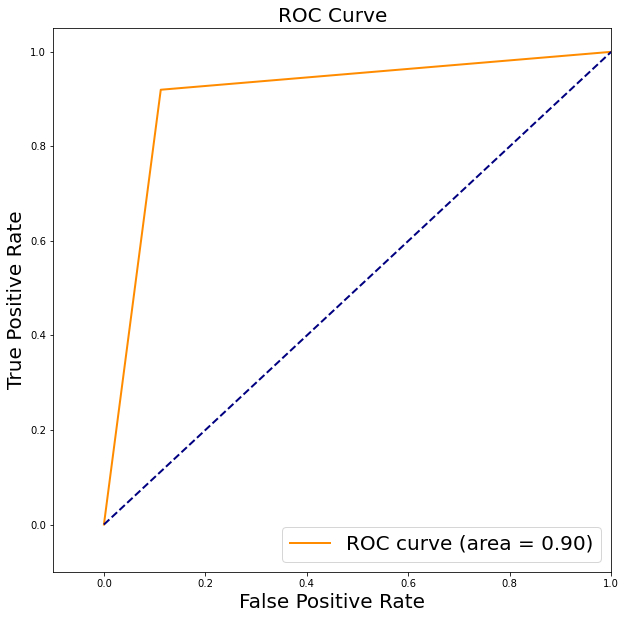

In [146]:
# definindo predições como 0 e 1 para plotar a curva ROC
predicoes_1 = model_1.predict()
predicoes_1 = np.where(predicoes_1 > 0.3, 1, 0)
#curva ROC
fpr, tpr, thresholds = roc_curve(df['diagnosis'], predicoes_1)
roc_auc = auc(fpr, tpr) 

#plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()

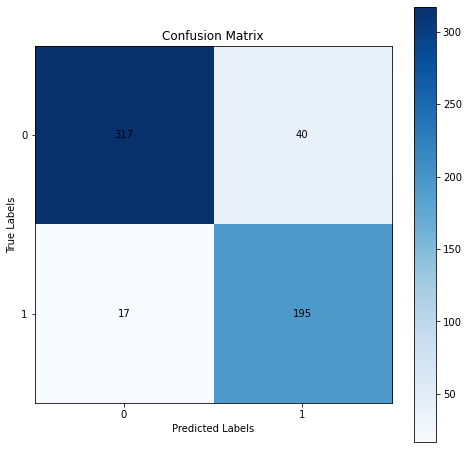

In [192]:
# plot da matriz de confusão
cm_1 = confusion_matrix(df['diagnosis'], predicoes_1)

#matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cm_1, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))

# Add text inside each square of the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_1[i, j]), ha='center', va='center', color='black')

plt.show()

In [206]:
#acurácia, sensibilidade, especificidade, precisão e f1-score
acuracia_1 = (cm_1[0,0] + cm_1[1,1]) / sum(sum(cm_1))
sensibilidade_1 = cm_1[1,1] / (cm_1[1,0] + cm_1[1,1])
especificidade_1 = cm_1[0,0] / (cm_1[0,0] + cm_1[0,1])
precisao_1 = cm_1[1,1] / (cm_1[0,1] + cm_1[1,1])
f1_score_1 = 2 * (precisao_1 * sensibilidade_1) / (precisao_1 + sensibilidade_1)
print(f"A acurácia do modelo foi {acuracia_1}")
print(f"A sensibilidade do modelo foi {sensibilidade_1}")
print(f"A especificidade do modelo foi {especificidade_1}")
print(f"A precisão do modelo foi {precisao_1}")
print(f"O f1-score do modelo foi {f1_score_1}")

A acurácia do modelo foi 0.8998242530755711
A sensibilidade do modelo foi 0.9198113207547169
A especificidade do modelo foi 0.8879551820728291
A precisão do modelo foi 0.8297872340425532
O f1-score do modelo foi 0.87248322147651


# Incrementando o modelo

In [116]:
#modelo de regressão logística com statsmodels
model_2 = sm.Logit.from_formula("diagnosis ~ ((radius_mean + radius_se) * radius_worst) + ((perimeter_mean + perimeter_se) * perimeter_worst) + ((concavity_mean + concavity_se) * concavity_worst) ", data = df).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.086349
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      553
Method:                           MLE   Df Model:                           15
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.8692
Time:                        11:13:36   Log-Likelihood:                -49.133
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.748e-129
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -15.4095     13.661     -1.128      0.259     -42.185      11.366
radius_mean                       17.1428      8.355      2.052      0.040       0.768      33.517
radius_se                         -9.6168     49.265     -0.195      0.845    -106.174      86.940
radius_worst                       9.8921      5.698      1.736      0.083      -1.275      21.059
radius_mean:radius_worst          -0.6348      0.428     -1.484      0.138      -1.473       0.204
radius_se:radius_worst             1.2817      2.936      0.437      0.662      -4.473       7.036
perimeter_mean                    -2.9881      1.292     -2.313      0.021      -5.520      -0.456
perimeter_se                       4.4213      5.593      0.791      0.429      -6.540      15.383
perimeter_worst                   -1.3047      0.878     -1.487      0.137      -3.025       0.415
perimeter_mean:perimeter_worst     0.0165      0.010      1.622      0.105      -0.003       0.036
perimeter_se:perimeter_worst      -0.0465      0.048     -0.972      0.331      -0.140       0.047
concavity_mean                    29.6634     40.244      0.737      0.461     -49.213     108.540
concavity_se                      21.1261     55.837      0.378      0.705     -88.313     130.565
concavity_worst                   14.0300      5.375      2.610      0.009       3.496      24.564
concavity_mean:concavity_worst    85.7082     86.323      0.993      0.321     -83.481     254.897
concavity_se:concavity_worst    -241.2285    150.480     -1.603      0.109    -536.164      53.707
==================================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [117]:
print(f"O aic do modelo foi {model_2.aic}")

O aic do modelo foi 130.26518614616987


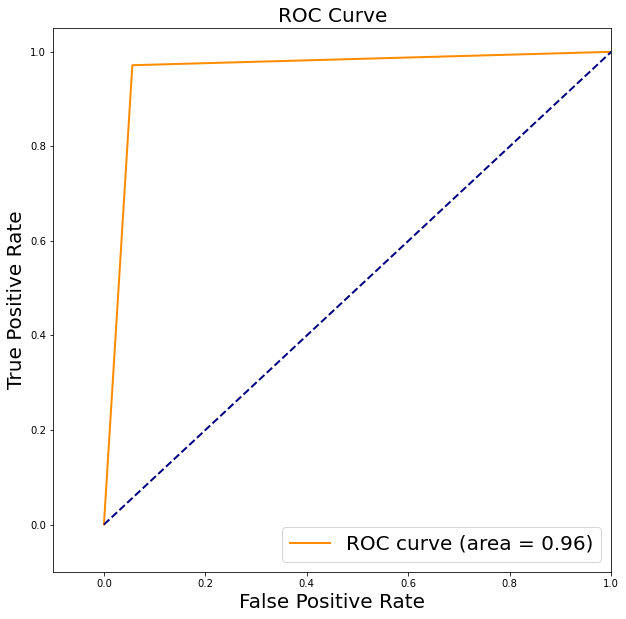

In [154]:
# definindo predições como 0 e 1 para plotar a curva ROC
predicoes_2 = model_2.predict()
predicoes_2 = np.where(predicoes_2 > 0.3, 1, 0)
#curva ROC
fpr, tpr, thresholds = roc_curve(df['diagnosis'], predicoes_2)
roc_auc = auc(fpr, tpr) 

#plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()

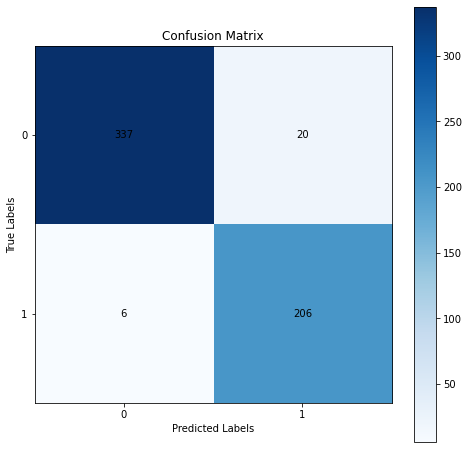

In [193]:
# plot da matriz de confusão
cm_2 = confusion_matrix(df['diagnosis'], predicoes_2)

#matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cm_2, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))

# Add text inside each square of the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_2[i, j]), ha='center', va='center', color='black')

plt.show()

In [207]:
#acurácia, sensibilidade, especificidade, precisão e f1-score
acuracia_2 = (cm_2[0,0] + cm_2[1,1]) / sum(sum(cm_2))
sensibilidade_2 = cm_2[1,1] / (cm_2[1,0] + cm_2[1,1])
especificidade_2 = cm_2[0,0] / (cm_2[0,0] + cm_2[0,1])
precisao_2 = cm_2[1,1] / (cm_2[0,1] + cm_2[1,1])
f1_score_2 = 2 * (precisao_2 * sensibilidade_2) / (precisao_2 + sensibilidade_2)
print(f"A acurácia do modelo foi {acuracia_2}")
print(f"A sensibilidade do modelo foi {sensibilidade_2}")
print(f"A especificidade do modelo foi {especificidade_2}")
print(f"A precisão do modelo foi {precisao_2}")
print(f"O f1-score do modelo foi {f1_score_2}")

A acurácia do modelo foi 0.9543057996485061
A sensibilidade do modelo foi 0.9716981132075472
A especificidade do modelo foi 0.9439775910364145
A precisão do modelo foi 0.911504424778761
O f1-score do modelo foi 0.9406392694063926


# Modelo apenas com as Médias

In [121]:
#modelo de regressão logística com statsmodels
model_mean = sm.Logit.from_formula("diagnosis ~ radius_mean + texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean", data = df).fit()
model_mean.summary()

Optimization terminated successfully.
         Current function value: 0.128410
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.8055
Time:                        11:13:53   Log-Likelihood:                -73.065
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.282e-123
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7.3595     12.853     -0.573      0.567     -32.550      17.831
radius_mean               -2.0493      3.716     -0.551      0.581      -9.332       5.234
texture_mean               0.3847      0.065      5.961      0.000       0.258       0.511
perimeter_mean            -0.0715      0.505     -0.142      0.887      -1.062       0.919
area_mean                  0.0398      0.017      2.377      0.017       0.007       0.073
smoothness_mean           76.4323     31.955      2.392      0.017      13.802     139.063
compactness_mean          -1.4624     20.342     -0.072      0.943     -41.333      38.408
concavity_mean             8.4687      8.120      1.043      0.297      -7.446      24.384
concave_points_mean       66.8218     28.529      2.342      0.019      10.906     122.738
symmetry_mean             16.2782     10.631      1.531      0.126      -4.557      37.114
fractal_dimension_mean   -68.3370     85.557     -0.799      0.424    -236.025      99.351
==========================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [122]:
print(f"O aic do modelo foi {model_mean.aic}")

O aic do modelo foi 168.13041843396468


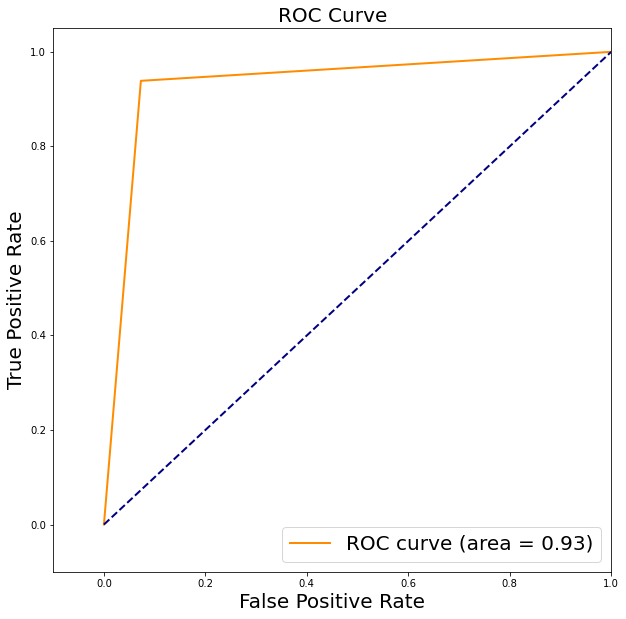

In [158]:
# definindo predições como 0 e 1 para plotar a curva ROC
predicoes_mean = model_mean.predict()
predicoes_mean = np.where(predicoes_mean > 0.3, 1, 0)
#curva ROC
fpr, tpr, thresholds = roc_curve(df['diagnosis'], predicoes_mean)
roc_auc = auc(fpr, tpr) 

#plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()

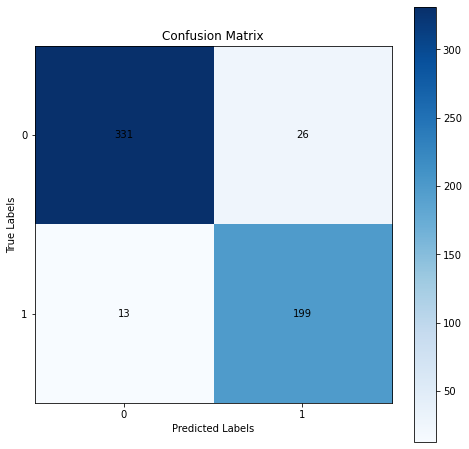

In [171]:
# plot da matriz de confusão
cm_mean = confusion_matrix(df['diagnosis'], predicoes_mean)

#matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cm_mean, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))

# Add text inside each square of the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_mean[i, j]), ha='center', va='center', color='black')

plt.show()

In [210]:
#acurácia, sensibilidade, especificidade, precisão e f1-score
acuracia_mean = (cm_mean[0,0] + cm_mean[1,1]) / sum(sum(cm_mean))
sensibilidade_mean = cm_mean[1,1] / (cm_mean[1,0] + cm_mean[1,1])
especificidade_mean = cm_mean[0,0] / (cm_mean[0,0] + cm_mean[0,1])
precisao_mean = cm_mean[1,1] / (cm_mean[0,1] + cm_mean[1,1])
f1_score_mean = 2 * (precisao_mean * sensibilidade_mean) / (precisao_mean + sensibilidade_mean)
print(f"A acurácia do modelo foi {acuracia_mean}")
print(f"A sensibilidade do modelo foi {sensibilidade_mean}")
print(f"A especificidade do modelo foi {especificidade_mean}")
print(f"A precisão do modelo foi {precisao_mean}")
print(f"O f1-score do modelo foi {f1_score_mean}")

A acurácia do modelo foi 0.9314586994727593
A sensibilidade do modelo foi 0.9386792452830188
A especificidade do modelo foi 0.927170868347339
A precisão do modelo foi 0.8844444444444445
O f1-score do modelo foi 0.9107551487414187


# Modelo SE

In [172]:
#modelo de regressão logística com statsmodels
model_se = sm.Logit.from_formula("diagnosis ~ radius_se + texture_se + perimeter_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se", data = df).fit()
model_se.summary()

Optimization terminated successfully.
         Current function value: 0.233671
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.6461
Time:                        11:30:34   Log-Likelihood:                -132.96
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 5.468e-98
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.3922      0.636     -5.335      0.000      -4.638      -2.146
radius_se              -28.2292      6.138     -4.599      0.000     -40.260     -16.199
texture_se              -0.3339      0.423     -0.789      0.430      -1.163       0.495
perimeter_se             0.0751      0.476      0.158      0.875      -0.858       1.008
area_se                  0.3935      0.057      6.890      0.000       0.282       0.505
smoothness_se            4.1996     98.694      0.043      0.966    -189.238     197.637
compactness_se          57.2538     28.689      1.996      0.046       1.025     113.483
concavity_se             3.6141     11.952      0.302      0.762     -19.810      27.039
concave_points_se       39.7669     64.176      0.620      0.535     -86.015     165.549
symmetry_se             -6.7619     30.459     -0.222      0.824     -66.460      52.936
fractal_dimension_se  -318.7333    149.297     -2.135      0.033    -611.349     -26.117
========================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [173]:
print(f"O aic do modelo foi {model_se.aic}")

O aic do modelo foi 287.91753695797547


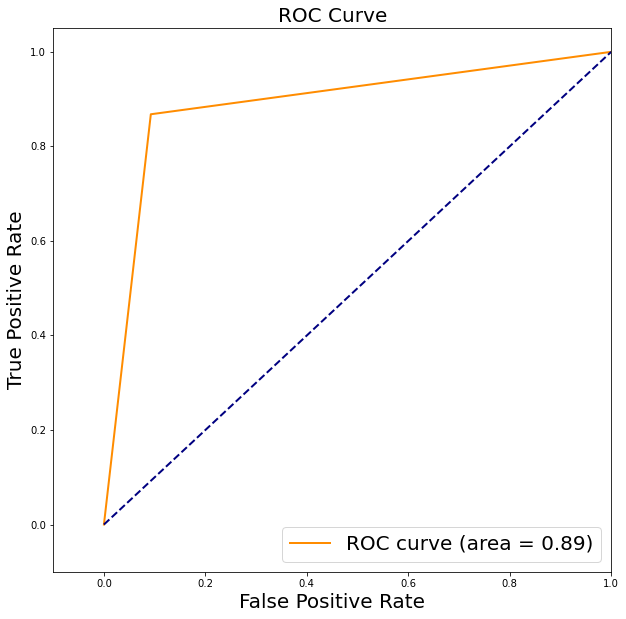

In [174]:
# definindo predições como 0 e 1 para plotar a curva ROC
predicoes_se = model_se.predict()
predicoes_se = np.where(predicoes_se > 0.3, 1, 0)
#curva ROC
fpr, tpr, thresholds = roc_curve(df['diagnosis'], predicoes_se)
roc_auc = auc(fpr, tpr) 

#plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()

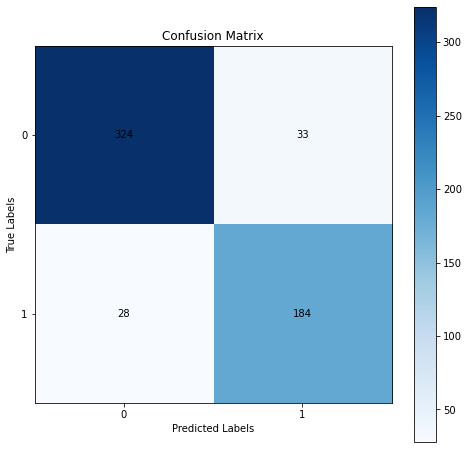

In [175]:
# plot da matriz de confusão
cm_se = confusion_matrix(df['diagnosis'], predicoes_se)

#matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cm_se, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))

# Add text inside each square of the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_se[i, j]), ha='center', va='center', color='black')

plt.show()

In [211]:
#acurácia, sensibilidade, especificidade, precisão e f1-score
acuracia_se = (cm_se[0,0] + cm_se[1,1]) / sum(sum(cm_se))
sensibilidade_se = cm_se[1,1] / (cm_se[1,0] + cm_se[1,1])
especificidade_se = cm_se[0,0] / (cm_se[0,0] + cm_se[0,1])
precisao_se = cm_se[1,1] / (cm_se[0,1] + cm_se[1,1])
f1_score_se = 2 * (precisao_se * sensibilidade_se) / (precisao_se + sensibilidade_se)
print(f"A acurácia do modelo foi {acuracia_se}")
print(f"A sensibilidade do modelo foi {sensibilidade_se}")
print(f"A especificidade do modelo foi {especificidade_se}")
print(f"A precisão do modelo foi {precisao_se}")
print(f"O f1-score do modelo foi {f1_score_se}")

A acurácia do modelo foi 0.8927943760984183
A sensibilidade do modelo foi 0.8679245283018868
A especificidade do modelo foi 0.907563025210084
A precisão do modelo foi 0.847926267281106
O f1-score do modelo foi 0.8578088578088577


# Modelo Worst

In [166]:
#modelo de regressão logística com statsmodels
model_worst = sm.Logit.from_formula("diagnosis ~ radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst", data = df).fit()
model_worst.summary()

Optimization terminated successfully.
         Current function value: 0.073433
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                           10
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.8888
Time:                        11:27:41   Log-Likelihood:                -41.784
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.930e-137
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -29.0015     13.495     -2.149      0.032     -55.451      -2.552
radius_worst               -0.5354      1.531     -0.350      0.727      -3.536       2.465
texture_worst               0.2825      0.060      4.705      0.000       0.165       0.400
perimeter_worst             0.0130      0.128      0.101      0.919      -0.239       0.265
area_worst                  0.0188      0.015      1.282      0.200      -0.010       0.047
smoothness_worst           53.9434     21.880      2.465      0.014      11.059      96.828
compactness_worst          -8.3172      8.448     -0.985      0.325     -24.874       8.240
concavity_worst             4.5799      3.372      1.358      0.174      -2.029      11.188
concave_points_worst       37.5487     16.156      2.324      0.020       5.884      69.213
symmetry_worst              9.6223      5.847      1.646      0.100      -1.838      21.082
fractal_dimension_worst    -7.8746     49.292     -0.160      0.873    -104.486      88.737
===========================================================================================

Possibly complete quasi-separation: A fraction 0.38 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [167]:
print(f"O aic do modelo foi {model_worst.aic}")

O aic do modelo foi 105.56701755834847


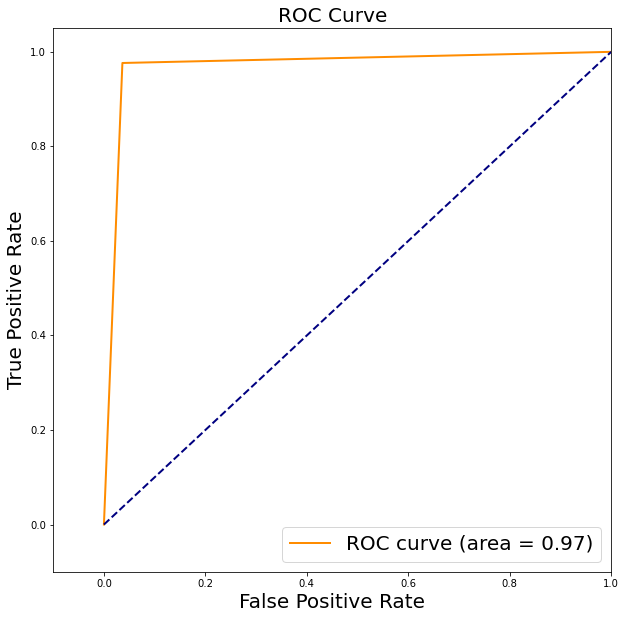

In [179]:
# definindo predições como 0 e 1 para plotar a curva ROC
predicoes_worst = model_worst.predict()
predicoes_worst = np.where(predicoes_worst > 0.3, 1, 0)
#curva ROC
fpr, tpr, thresholds = roc_curve(df['diagnosis'], predicoes_worst)
roc_auc = auc(fpr, tpr) 

#plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()

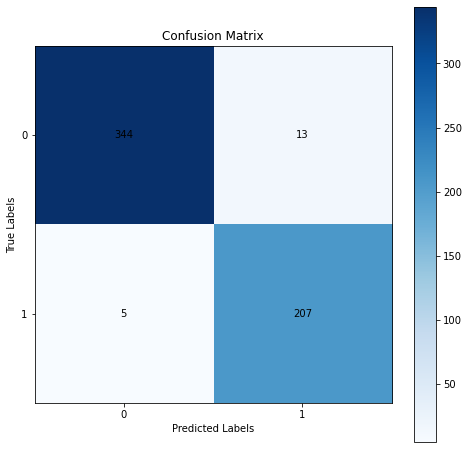

In [180]:
# plot da matriz de confusão
cm_worst = confusion_matrix(df['diagnosis'], predicoes_worst)

#matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cm_worst, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))

# Add text inside each square of the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_worst[i, j]), ha='center', va='center', color='black')

plt.show()

In [212]:
#acurácia, sensibilidade, especificidade, precisão e f1-score
acuracia_worst = (cm_worst[0,0] + cm_worst[1,1]) / sum(sum(cm_worst))
sensibilidade_worst = cm_worst[1,1] / (cm_worst[1,0] + cm_worst[1,1])
especificidade_worst = cm_worst[0,0] / (cm_worst[0,0] + cm_worst[0,1])
precisao_worst = cm_worst[1,1] / (cm_worst[0,1] + cm_worst[1,1])
f1_score_worst = 2 * (precisao_worst * sensibilidade_worst) / (precisao_worst + sensibilidade_worst)
print(f"A acurácia do modelo foi {acuracia_worst}")
print(f"A sensibilidade do modelo foi {sensibilidade_worst}")
print(f"A especificidade do modelo foi {especificidade_worst}")
print(f"A precisão do modelo foi {precisao_worst}")
print(f"O f1-score do modelo foi {f1_score_worst}")

A acurácia do modelo foi 0.968365553602812
A sensibilidade do modelo foi 0.9764150943396226
A especificidade do modelo foi 0.9635854341736695
A precisão do modelo foi 0.9409090909090909
O f1-score do modelo foi 0.9583333333333334


In [181]:
#comparativo dos aic's
print(f"O aic do modelo com mean foi {model_mean.aic}")
print(f"O aic do modelo com se foi {model_se.aic}")
print(f"O aic do modelo com worst foi {model_worst.aic}")

O aic do modelo com mean foi 168.13041843396468
O aic do modelo com se foi 287.91753695797547
O aic do modelo com worst foi 105.56701755834847


In [213]:
#comparativo das sensibilidades
print(f"A sensibilidade do modelo com mean foi {sensibilidade_mean}")
print(f"A sensibilidade do modelo com se foi {sensibilidade_se}")
print(f"A sensibilidade do modelo com worst foi {sensibilidade_worst}")

A sensibilidade do modelo com mean foi 0.9386792452830188
A sensibilidade do modelo com se foi 0.8679245283018868
A sensibilidade do modelo com worst foi 0.9764150943396226


In [214]:
#comparativo dos f1-scores
print(f"O f1-score do modelo com mean foi {f1_score_mean}")
print(f"O f1-score do modelo com se foi {f1_score_se}")
print(f"O f1-score do modelo com worst foi {f1_score_worst}")

O f1-score do modelo com mean foi 0.9107551487414187
O f1-score do modelo com se foi 0.8578088578088577
O f1-score do modelo com worst foi 0.9583333333333334


# Modelo 3

In [188]:
#modelo de regressão logística com statsmodels
model_3 = sm.Logit.from_formula("diagnosis ~ ((smoothness_mean + smoothness_se) * smoothness_worst) + ((concave_points_mean + concave_points_se) * concave_points_worst) + ((symmetry_mean + symmetry_se) * symmetry_worst)", data = df).fit()
model_3.summary()

         Current function value: 0.145591
         Iterations: 35


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      553
Method:                           MLE   Df Model:                           15
Date:                Mon, 26 Jun 2023   Pseudo R-squ.:                  0.7795
Time:                        11:37:42   Log-Likelihood:                -82.841
converged:                      False   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                3.763e-115
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    5.9872     11.187      0.535      0.593     -15.939      27.914
smoothness_mean                           -134.6967    109.033     -1.235      0.217    -348.398      79.005
smoothness_se                              161.2980    421.751      0.382      0.702    -665.319     987.915
smoothness_worst                            42.7411     69.031      0.619      0.536     -92.556     178.038
smoothness_mean:smoothness_worst           -10.6134    777.221     -0.014      0.989   -1533.938    1512.711
smoothness_se:smoothness_worst            -600.1329   2739.859     -0.219      0.827   -5970.159    4769.893
concave_points_mean                         44.1513     60.158      0.734      0.463     -73.755     162.058
concave_points_se                          393.0103    220.983      1.778      0.075     -40.108     826.129
concave_points_worst                        10.5409     19.442      0.542      0.588     -27.566      48.647
concave_points_mean:concave_points_worst   940.9138    483.006      1.948      0.051      -5.760    1887.588
concave_points_se:concave_points_worst   -3743.6121   1575.793     -2.376      0.018   -6832.110    -655.114
symmetry_mean                              -41.8060     57.678     -0.725      0.469    -154.853      71.241
symmetry_se                               -363.1949    229.002     -1.586      0.113    -812.030      85.640
symmetry_worst                              -6.6584     36.052     -0.185      0.853     -77.318      64.001
symmetry_mean:symmetry_worst                62.2307    209.379      0.297      0.766    -348.144     472.605
symmetry_se:symmetry_worst                 913.6255    743.027      1.230      0.219    -542.680    2369.931
============================================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [189]:
print(f"O aic do modelo foi {model_3.aic}")

O aic do modelo foi 197.68289730892997


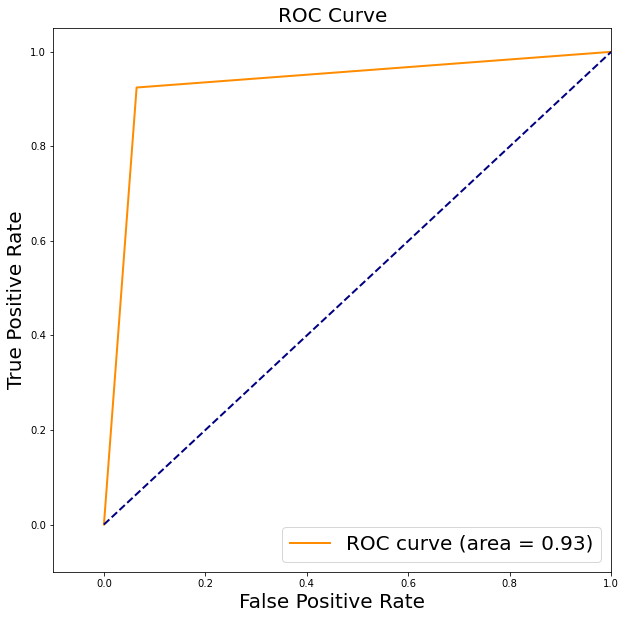

In [190]:
# definindo predições como 0 e 1 para plotar a curva ROC
predicoes_3 = model_3.predict()
predicoes_3 = np.where(predicoes_3 > 0.3, 1, 0)
#curva ROC
fpr, tpr, thresholds = roc_curve(df['diagnosis'], predicoes_3)
roc_auc = auc(fpr, tpr) 

#plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()

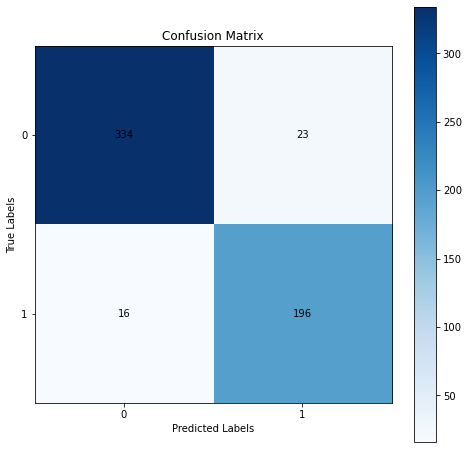

In [191]:
# plot da matriz de confusão
cm_3 = confusion_matrix(df['diagnosis'], predicoes_3)

#matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cm_3, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))

# Add text inside each square of the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_3[i, j]), ha='center', va='center', color='black')

plt.show()

In [215]:
#acurácia, sensibilidade, especificidade, precisão e f1-score
acuracia_3 = (cm_3[0,0] + cm_3[1,1]) / sum(sum(cm_3))
sensibilidade_3 = cm_3[1,1] / (cm_3[1,0] + cm_3[1,1])
especificidade_3 = cm_3[0,0] / (cm_3[0,0] + cm_3[0,1])
precisao_3 = cm_3[1,1] / (cm_3[0,1] + cm_3[1,1])
f1_score_3 = 2 * (precisao_3 * sensibilidade_3) / (precisao_3 + sensibilidade_3)
print(f"A acurácia do modelo foi {acuracia_3}")
print(f"A sensibilidade do modelo foi {sensibilidade_3}")
print(f"A especificidade do modelo foi {especificidade_3}")
print(f"A precisão do modelo foi {precisao_3}")
print(f"O f1-score do modelo foi {f1_score_3}")

A acurácia do modelo foi 0.9314586994727593
A sensibilidade do modelo foi 0.9245283018867925
A especificidade do modelo foi 0.9355742296918768
A precisão do modelo foi 0.8949771689497716
O f1-score do modelo foi 0.9095127610208816


In [216]:
#comparativo dos aic's dos modelos 1, 2 e 3
print(f"O aic do modelo 1 foi {model_1.aic}")
print(f"O aic do modelo 2 foi {model_2.aic}")
print(f"O aic do modelo 3 foi {model_3.aic}")

O aic do modelo 1 foi 256.993783383435
O aic do modelo 2 foi 130.26518614616987
O aic do modelo 3 foi 197.68289730892997


In [217]:
#comparativo da sensibilidade dos modelos 1, 2 e 3
print(f"A sensibilidade do modelo 1 foi {sensibilidade_1}")
print(f"A sensibilidade do modelo 2 foi {sensibilidade_2}")
print(f"A sensibilidade do modelo 3 foi {sensibilidade_3}")

A sensibilidade do modelo 1 foi 0.9198113207547169
A sensibilidade do modelo 2 foi 0.9716981132075472
A sensibilidade do modelo 3 foi 0.9245283018867925


In [218]:
#comparativo dos f1-scores dos modelos 1, 2 e 3
print(f"O f1-score do modelo 1 foi {f1_score_1}")
print(f"O f1-score do modelo 2 foi {f1_score_2}")
print(f"O f1-score do modelo 3 foi {f1_score_3}")

O f1-score do modelo 1 foi 0.87248322147651
O f1-score do modelo 2 foi 0.9406392694063926
O f1-score do modelo 3 foi 0.9095127610208816
